In [1]:
import gensim
import os
from distutils.version import LooseVersion, StrictVersion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [2]:
# dir_path=os.path.dirname('D:/Ki7/PBL6/')
# print(dir_path)
# model = dir_path + '/wiki.vi.model.bin'

In [3]:
# if os.path.isfile(model):
#     word2vec_model  = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
# else: print("No")

In [4]:
# word2vec_model.key_to_index
# word2vec_model['đảng']
# word2vec_model.evaluate_word_analogies
# word2vec_model.get_index('mèo')
# vector = word2vec_model.get_vector('office', norm=True)
# vector.shape

In [5]:
from gensim.models import Word2Vec

In [6]:
skipgram = Word2Vec.load('skipgram_400.bin')

In [7]:
print(skipgram.wv['cộng_sản'])

[-3.70163858e-01 -3.31106722e-01 -2.35302076e-01  1.59370989e-01
  1.94755688e-01 -9.75020602e-02 -3.67763638e-01  3.87834102e-01
 -1.27237424e-01 -7.44759664e-02 -3.21903139e-01 -5.66082120e-01
 -6.19986296e-01 -5.19812033e-02  2.29523927e-01  2.81616151e-01
 -1.66389704e-01  2.48944834e-01 -1.34661227e-01  2.02390805e-01
  1.53337032e-01 -2.77776301e-01 -8.27220529e-02 -1.62131675e-02
 -2.97658425e-02 -2.33693905e-02 -4.22697157e-01 -2.15118498e-01
 -4.27308768e-01 -2.41023317e-01  2.12151051e-01  2.53123760e-01
  7.06238598e-02 -7.69345369e-03 -2.25564674e-01  9.08237994e-02
 -2.87739545e-01 -9.89735574e-02 -5.58787957e-02 -1.56185880e-01
 -2.67824858e-01 -1.11862384e-01 -1.74782050e-04  1.27378285e-01
 -2.84531862e-01  1.29756540e-01 -3.73072743e-01 -2.61724323e-01
  1.51361227e-01 -4.36707474e-02  5.01866043e-02  5.12591064e-01
 -7.29763955e-02 -4.36228573e-01 -9.10093188e-02  7.63919577e-03
 -1.60190970e-01 -5.76906046e-03 -1.17137127e-01 -1.29762534e-02
  2.90878773e-01 -6.77797

In [8]:
skipgram.wv.most_similar('cộng_sản', topn=5)

[('cs', 0.6261704564094543),
 ('đảng_cộng_sản', 0.58404940366745),
 ('baath', 0.5530807375907898),
 ('cộng_sản_liên_xô', 0.5429332256317139),
 ('đcs', 0.5297978520393372)]

In [9]:
skipgram.wv.most_similar('đảng', topn=5)

[('ðảng', 0.6530534029006958),
 ('đảng_', 0.6175108551979065),
 ('đảng_cs', 0.6105231046676636),
 ('kiện_toàn_bộ_máy', 0.6065214276313782),
 ('ðại_hội_xiii', 0.5998976826667786)]

In [10]:
skipgram.wv.most_similar('đảng_cs', topn=5)

[('phân_liệt', 0.730603039264679),
 ('đcs', 0.7284179925918579),
 ('đcsvn', 0.6981561779975891),
 ('đảng_', 0.6961345076560974),
 ('ðảng_csvn', 0.6865062117576599)]

In [11]:
skipgram.wv.most_similar('phản_động', topn=20)

[('nguyên_thạch', 0.6064838171005249),
 ('tráo_trở', 0.5880512595176697),
 ('nguyễn_doãn_đôn', 0.5806435346603394),
 ('mạc_văn_trang', 0.5804444551467896),
 ('phần_tử', 0.5803757309913635),
 ('hoảng_hiền', 0.5752359628677368),
 ('thù_địch', 0.5749219059944153),
 ('thanh_niên_biểu_tình', 0.5717163681983948),
 ('a_dua', 0.5696958303451538),
 ('thu_hà', 0.5669335722923279),
 ('phản_loạn', 0.5664229989051819),
 ('đồi_trụy', 0.5634889006614685),
 ('viettusaigon', 0.5632947087287903),
 ('phámột', 0.5625805854797363),
 ('thông_đồng_trục_lợi', 0.5619875192642212),
 ('săn_lùng', 0.5614863634109497),
 ('đồi_truỵ', 0.5612614750862122),
 ('nguyễn_hữu_vĩnh', 0.5606578588485718),
 ('phạm_minh_vũ', 0.5604133605957031),
 ('thảo_ngọc', 0.560123085975647)]

In [12]:
len(skipgram.wv)

72078

In [13]:
len(skipgram.wv['đảng'])

400

In [14]:
data = pd.read_csv('news_clean_2.csv')

In [15]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Title,Title_processed,Content,Content_processed,label
0,0,0,Cử tri lo ngại tội phạm gia tăng do ma túy,cử_tri lo_ngại tội_phạm gia_tăng ma_túy,Cử tri kiến nghị mạnh tay hơn với vấn nạn ma t...,cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...,real
1,1,1,"""Nhiều đại án khiến chúng ta không khỏi giật m...",nhiều đại án giật_mình thất_thoát lớn,"Sáng 31/10, thảo luận ở hội trường về việc th...",sáng 31 10 thảo_luận hội_trường chính_sách phá...,real
2,2,2,"Cần đổi mới mạnh mẽ tư duy, tạo đột phá thúc đ...",cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...,"Tham dự có Phó Thủ tướng Lê Minh Khái, Phó Thủ...",tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...,real
3,3,3,Thủ tướng: Nguồn vốn nhà nước đóng vai trò dẫn...,thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...,"Chiều 13/11, Thủ tướng Phạm Minh Chính chủ trì...",chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...,real
4,4,4,Tổng bí thư Nguyễn Phú Trọng làm Trưởng ban l...,tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...,"Chiều 23.9, Ban Chấp hành Trung ương Đảng Cộn...",chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...,real


In [16]:
data.Content_processed[0]


'cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_xúc cử_tri xã hòa_minh tội_phạm tội_phạm cướp_giật trộm_cắp gia_tăng nguồn_gốc ma_túy lê_văn_đế cử_tri xã hòa_minh bà_con cử_tri kiến_nghị quốc_hội điều_chỉnh luật ma_túy tội_phạm bệnh_nhân cử_tri đế quốc_hội giải_quyết ngăn_chặn tệ_nạn ma_túy đbqh lên_tiếng điều_chỉnh luật chặn_đứng tệ_nạn mua_bán tàng_trữ ma_túy xã_hội lớp thanh_thiếu_niên cử_tri cao_tuổi xã hòa_minh phát_biểu trao_đổi đbqh lê_quốc_phong 25 6 ảnh quế hà_ông huỳnh_văn_trang chủ_tịch mttq xã hòa_minh luật bất_cập nhắm đối_tượng nhà_ở cán_bộ nhân_viên thu_nhập cử_tri phản_ánh chính_quyền bình_thuận dân tách sổ đất nông_nghiệp 1 000 m2 tinh_thần luật đất_đai chỉnh sửa nông_thôn cử_tri ví_dụ hộ gia_đình nông_thôn 1 000 m2 đất tách chia con_cái canh_tác quy_định tỉnh tách dân luật_khoáng_sản thất_thoát tài_nguyên nguyễn_trường_nhân phó chủ_tịch hđnd xã hòa_minh luật khoáng_sản thất_thoát tài_nguyên khoáng_sản quốc_gia cử_tri điều_chỉnh tăng_cường trách_nhiệm công_tác quản_lý n

In [17]:
stringdata=[]
for i in range(len(data)):
    stringdata.append(str(data.Title_processed[i])+' '+str(data.Content_processed[i]))


In [18]:
stringdata[0]

'cử_tri lo_ngại tội_phạm gia_tăng ma_túy cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_xúc cử_tri xã hòa_minh tội_phạm tội_phạm cướp_giật trộm_cắp gia_tăng nguồn_gốc ma_túy lê_văn_đế cử_tri xã hòa_minh bà_con cử_tri kiến_nghị quốc_hội điều_chỉnh luật ma_túy tội_phạm bệnh_nhân cử_tri đế quốc_hội giải_quyết ngăn_chặn tệ_nạn ma_túy đbqh lên_tiếng điều_chỉnh luật chặn_đứng tệ_nạn mua_bán tàng_trữ ma_túy xã_hội lớp thanh_thiếu_niên cử_tri cao_tuổi xã hòa_minh phát_biểu trao_đổi đbqh lê_quốc_phong 25 6 ảnh quế hà_ông huỳnh_văn_trang chủ_tịch mttq xã hòa_minh luật bất_cập nhắm đối_tượng nhà_ở cán_bộ nhân_viên thu_nhập cử_tri phản_ánh chính_quyền bình_thuận dân tách sổ đất nông_nghiệp 1 000 m2 tinh_thần luật đất_đai chỉnh sửa nông_thôn cử_tri ví_dụ hộ gia_đình nông_thôn 1 000 m2 đất tách chia con_cái canh_tác quy_định tỉnh tách dân luật_khoáng_sản thất_thoát tài_nguyên nguyễn_trường_nhân phó chủ_tịch hđnd xã hòa_minh luật khoáng_sản thất_thoát tài_nguyên khoáng_sản quốc_gia cử_tri điều_chỉnh t

In [19]:
data['Title_Content_processed']=stringdata

In [20]:
length=[]
for i in range(len(data)):
    length.append(len(str(data.Title_Content_processed[i]).split()))

In [21]:
data['length']=length

In [22]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data
 

data_clean = removeOutliers(data, "length").reset_index()

In [23]:
data_clean.head()

,index,Unnamed: 0.1,Unnamed: 0,Title,Title_processed,Content,Content_processed,label,Title_Content_processed,length
0,0,0,0,Cử tri lo ngại tội phạm gia tăng do ma túy,cử_tri lo_ngại tội_phạm gia_tăng ma_túy,Cử tri kiến nghị mạnh tay hơn với vấn nạn ma t...,cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...,real,cử_tri lo_ngại tội_phạm gia_tăng ma_túy cử_tri...,224
1,1,1,1,"""Nhiều đại án khiến chúng ta không khỏi giật m...",nhiều đại án giật_mình thất_thoát lớn,"Sáng 31/10, thảo luận ở hội trường về việc th...",sáng 31 10 thảo_luận hội_trường chính_sách phá...,real,nhiều đại án giật_mình thất_thoát lớn sáng 31 ...,530
2,2,2,2,"Cần đổi mới mạnh mẽ tư duy, tạo đột phá thúc đ...",cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...,"Tham dự có Phó Thủ tướng Lê Minh Khái, Phó Thủ...",tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...,real,cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...,1024
3,3,3,3,Thủ tướng: Nguồn vốn nhà nước đóng vai trò dẫn...,thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...,"Chiều 13/11, Thủ tướng Phạm Minh Chính chủ trì...",chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...,real,thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...,469
4,4,4,4,Tổng bí thư Nguyễn Phú Trọng làm Trưởng ban l...,tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...,"Chiều 23.9, Ban Chấp hành Trung ương Đảng Cộn...",chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...,real,tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...,563


In [107]:
len(data_clean.Content_processed.iloc[0].split())

219

In [24]:
data_clean_split=[]

In [25]:
for i in range(len(data_clean)):
    clean_split=str(data_clean.Title_Content_processed[i]).split()
    for i in clean_split:
        data_clean_split.append(i)

In [26]:
data_clean_split[0]

'cử_tri'

In [27]:
len(data_clean_split)

410739

In [28]:
dict={}

In [29]:
for i in data_clean_split:
    dict[i]=1

In [30]:
len(dict)

25057

In [31]:
list_word=list(dict.keys())

In [32]:
list_word[0]

'cử_tri'

In [33]:
word2vecdata=[]

In [34]:
for word in list_word:
    word2vecdata.append(skipgram.wv[word])

In [35]:
len(word2vecdata)

25057

In [36]:
len(word2vecdata[0])

400

In [37]:
from sklearn.manifold import TSNE
import plotly.express as px
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [38]:
def FunctionText2Vec(inpTextData):
    W2Vec_Data=pd.DataFrame()
    for i in inpTextData:
        Sentence = np.zeros(400)
        WordsVocab=str(i).split()
        for word in WordsVocab:
            try:
                Sentence=Sentence+skipgram.wv[word]
            except:
                Sentence=Sentence+np.zeros(400)
        Sentence=Sentence/len(WordsVocab)
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))     
    return(W2Vec_Data)

In [39]:
W2Vec_Data=FunctionText2Vec(data_clean['Title_Content_processed'])

C:\Users\hotai\AppData\Local\Temp\ipykernel_6936\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_6936\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_6936\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_6936\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.appen

In [40]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.003334,0.079258,0.071692,0.113724,0.093399,-0.223469,0.067593,0.004381,0.001425,-0.055034,...,0.078021,-0.304127,0.057785,0.197029,0.032320,-0.076253,-0.032541,-0.167095,0.008805,0.120750
0,-0.044679,0.100626,0.082427,0.104301,0.104742,-0.237165,0.018088,-0.014314,0.037722,-0.093971,...,0.074455,-0.260465,-0.015553,0.169664,0.102826,-0.084157,-0.019070,-0.158016,0.060995,0.133332
0,-0.069113,0.106199,0.047731,0.065256,0.088577,-0.231998,0.086787,0.045455,0.000980,-0.175675,...,0.020897,-0.278973,-0.044240,0.187042,0.034580,-0.077019,-0.057118,-0.203820,0.031179,0.066699
0,-0.056103,0.136976,0.071629,0.060978,0.131738,-0.170867,0.056547,-0.006340,0.049816,-0.243357,...,0.014048,-0.354045,-0.045843,0.172804,0.061797,-0.075433,-0.020708,-0.166963,0.037865,-0.024196
0,-0.026369,0.141525,-0.032760,0.105729,0.173181,-0.105647,-0.022036,0.110448,-0.019580,-0.035767,...,0.069008,-0.161952,0.005664,0.116604,0.002261,-0.119295,0.001146,-0.186900,-0.069191,0.183541


In [41]:
W2Vec_Data.shape

(968, 400)

In [42]:
len(data_clean)

968

In [43]:
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['label']=data_clean['label']
W2Vec_Data['index']=data_clean['index']

In [44]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,label,index
0,0.003334,0.079258,0.071692,0.113724,0.093399,-0.223469,0.067593,0.004381,0.001425,-0.055034,...,0.057785,0.197029,0.032320,-0.076253,-0.032541,-0.167095,0.008805,0.120750,real,0
1,-0.044679,0.100626,0.082427,0.104301,0.104742,-0.237165,0.018088,-0.014314,0.037722,-0.093971,...,-0.015553,0.169664,0.102826,-0.084157,-0.019070,-0.158016,0.060995,0.133332,real,1
2,-0.069113,0.106199,0.047731,0.065256,0.088577,-0.231998,0.086787,0.045455,0.000980,-0.175675,...,-0.044240,0.187042,0.034580,-0.077019,-0.057118,-0.203820,0.031179,0.066699,real,2
3,-0.056103,0.136976,0.071629,0.060978,0.131738,-0.170867,0.056547,-0.006340,0.049816,-0.243357,...,-0.045843,0.172804,0.061797,-0.075433,-0.020708,-0.166963,0.037865,-0.024196,real,3
4,-0.026369,0.141525,-0.032760,0.105729,0.173181,-0.105647,-0.022036,0.110448,-0.019580,-0.035767,...,0.005664,0.116604,0.002261,-0.119295,0.001146,-0.186900,-0.069191,0.183541,real,4


In [45]:
W2Vec_Data.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
397      0
398      0
399      0
label    0
index    0
Length: 402, dtype: int64

In [46]:
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,label,index
0,0.003334,0.079258,0.071692,0.113724,0.093399,-0.223469,0.067593,0.004381,0.001425,-0.055034,...,0.057785,0.197029,0.032320,-0.076253,-0.032541,-0.167095,0.008805,0.120750,real,0
1,-0.044679,0.100626,0.082427,0.104301,0.104742,-0.237165,0.018088,-0.014314,0.037722,-0.093971,...,-0.015553,0.169664,0.102826,-0.084157,-0.019070,-0.158016,0.060995,0.133332,real,1
2,-0.069113,0.106199,0.047731,0.065256,0.088577,-0.231998,0.086787,0.045455,0.000980,-0.175675,...,-0.044240,0.187042,0.034580,-0.077019,-0.057118,-0.203820,0.031179,0.066699,real,2
3,-0.056103,0.136976,0.071629,0.060978,0.131738,-0.170867,0.056547,-0.006340,0.049816,-0.243357,...,-0.045843,0.172804,0.061797,-0.075433,-0.020708,-0.166963,0.037865,-0.024196,real,3
4,-0.026369,0.141525,-0.032760,0.105729,0.173181,-0.105647,-0.022036,0.110448,-0.019580,-0.035767,...,0.005664,0.116604,0.002261,-0.119295,0.001146,-0.186900,-0.069191,0.183541,real,4


In [47]:
TargetVariable=DataForML.columns[-2:]
Predictors=DataForML.columns[:-2]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
PredictorScaler=MinMaxScaler()
 

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(677, 400)
(677, 2)
(291, 400)
(291, 2)


Visualize

In [52]:
type(X_train)

numpy.ndarray

In [53]:
pca_breast = PCA(n_components=2)
x_train_pca2 = pca_breast.fit_transform(X_train)

In [54]:
x_train_pca2_Df = pd.DataFrame(data = x_train_pca2, columns = ['x', 'y'])

In [55]:
x_train_pca2_Df.head()

,x,y
0,-1.396666,-0.095065
1,2.429342,-0.418533
2,-0.300838,-0.709767
3,1.880008,-0.304413
4,0.216384,-1.257827


In [56]:
y_train[0][0]

'fake'

In [57]:
y_label=[]
for i in y_train:
    if i[0] =='fake':
        y_label.append(0)
    else:
        y_label.append(1)

In [58]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

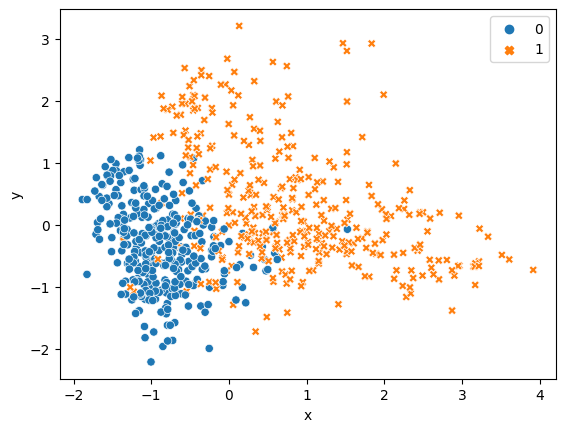

In [59]:
sns.scatterplot(x = x_train_pca2_Df.x, y=x_train_pca2_Df.y,
               hue = y_label, style=y_label)

In [60]:
pca_breast = PCA(n_components=3)
x_train_pca3 = pca_breast.fit_transform(X_train)

In [61]:
x_train_pca3_Df = pd.DataFrame(data = x_train_pca3, columns = ['x', 'y','z'])

In [62]:
x_train_pca3_Df.head()

,x,y,z
0,-1.396666,-0.095065,-0.233683
1,2.429342,-0.418533,0.181539
2,-0.300838,-0.709767,-0.506779
3,1.880008,-0.304413,-1.081374
4,0.216384,-1.257827,-0.094619


In [63]:
fig = px.scatter_3d(
    x_train_pca3_Df, x="x", y="y", z="z",
    color=y_label, labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

t-SNE visualine

In [64]:
features = X_train

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_label, labels={'color': 'Label'}
)
fig.update_traces(marker_size=8)
fig.show()

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [66]:
y_train1=[]

In [67]:
for i in y_train:
    y_train1.append(i[0])

In [68]:
y_test1=[]

In [69]:
for i in y_test:
    y_test1.append(i[0])

In [70]:
clf = KNeighborsClassifier(n_neighbors = 5, p = 2)
clf.fit(X_train, y_train1)
y_pred = clf.predict(X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

Accuracy: 0.9381443298969072


In [72]:
from sklearn.metrics import confusion_matrix
lang=['fake','real']
cm= confusion_matrix(y_test1, y_pred)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

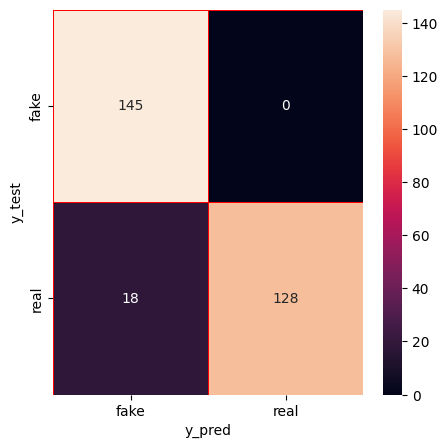

In [73]:

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [74]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred[i]:
        print(i)


6
28
31
37
50
123
130
138
142
149
153
157
172
188
204
216
241
250


Neive bayes

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [76]:
clf = MultinomialNB()

In [77]:
clf.fit(X_train, y_train1)

MultinomialNB()

In [78]:
y_pred1 = clf.predict(X_test)

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9347079037800687


In [80]:

cm= confusion_matrix(y_test1, y_pred1)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

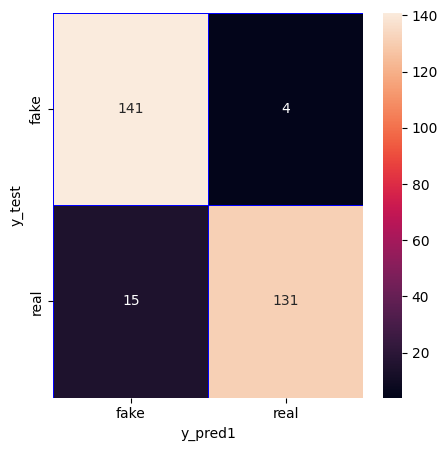

In [81]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax)

plt.xlabel("y_pred1")
plt.ylabel("y_test")
plt.show()

In [82]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred1[i]:
        print(i)


13
15
28
31
32
37
48
62
65
115
116
130
153
157
172
181
250
263
280


SVM

In [83]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train1)

SVC(kernel='linear')

In [84]:
y_pred3 = svclassifier.predict(X_test)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred3))

Accuracy: 0.9759450171821306


In [86]:
cm= confusion_matrix(y_test1, y_pred3)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(cm)
print(classification_report(y_test1,y_pred3))

[[144   1]
 [  6 140]]
              precision    recall  f1-score   support

        fake       0.96      0.99      0.98       145
        real       0.99      0.96      0.98       146

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



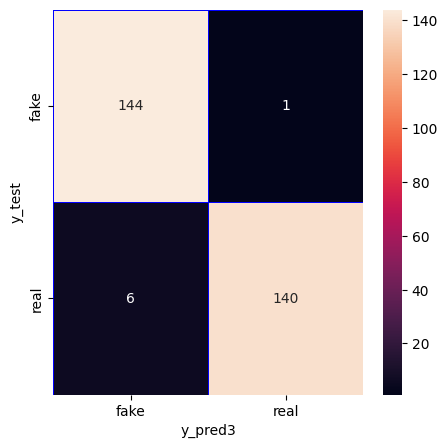

In [88]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax)

plt.xlabel("y_pred3")
plt.ylabel("y_test")
plt.show()

In [89]:
index_co=[]

In [90]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred3[i]:
        index_co.append(y_test[i][1])


In [91]:
index_co

[167, 582, 278, 339, 482, 195, 326]

In [92]:
data_clean.Title_processed[167]

'thủ_tướng nguyễn_xuân_phúc việt_nam coi_trọng quan_hệ ấn_độ'

In [93]:
data_clean.Content_processed[167]

'tại hội_kiến tổng_thống ram_nath_kovind hoan_nghênh thủ_tướng nguyễn_xuân_phúc đoàn đại_biểu chính_phủ việt_nam dự hội_nghị kỷ_niệm 25 quan_hệ đối_tác asean ấn_độ thủ_tướng nguyễn_xuân_phúc nhận_lời mời lễ kỷ_niệm 69 ngày_cộng_hòa_ấn_độ thủ_tướng nguyễn_xuân_phúc chúc_mừng tổng_thống ram_nath_kovind nhân_dân ấn_độ bầu tin_tưởng lãnh_đạo tổng_thống ấn_độ giành thành_tựu ấn_độ cường_quốc khu_vực thủ_tướng nguyễn_xuân_phúc gửi ủng_hộ giúp_đỡ quý_báu đất_nước nhân_dân ấn_độ việt_nam sự_nghiệp đấu_tranh_giành độc_lập dân_tộc công_cuộc xây_dựng phát_triển đất_nước chính_sách nhất_quán việt_nam coi_trọng quan_hệ bạn_bè truyền_thống ấn_độ thủ_tướng nguyễn_xuân_phúc tham_dự hội_nghị asean ấn_độtổng_thống ram_nath_kovind nhấn_mạnh ý_nghĩa quan_hệ hữu_nghị truyền_thống ấn_độ việt_nam cố_thủ_tướng jawaharlal_nehru chủ_tịch hồ_chí_minh nền_móng hai vun_đắp coi việt_nam trụ_cột chính_sách hành_động hướng đông ấn_độ kovind nỗ_lực tăng_cường quan_hệ đối_tác_chiến_lược toàn_diện việt_nam lĩnh_vực nền_

In [94]:
for i in index_co:
    print(str(i)+ " : "+ str(data_clean.label[i]))
    print(data_clean.Title_processed[i]+" "+data_clean.Content_processed[i])

167 : real
thủ_tướng nguyễn_xuân_phúc việt_nam coi_trọng quan_hệ ấn_độ tại hội_kiến tổng_thống ram_nath_kovind hoan_nghênh thủ_tướng nguyễn_xuân_phúc đoàn đại_biểu chính_phủ việt_nam dự hội_nghị kỷ_niệm 25 quan_hệ đối_tác asean ấn_độ thủ_tướng nguyễn_xuân_phúc nhận_lời mời lễ kỷ_niệm 69 ngày_cộng_hòa_ấn_độ thủ_tướng nguyễn_xuân_phúc chúc_mừng tổng_thống ram_nath_kovind nhân_dân ấn_độ bầu tin_tưởng lãnh_đạo tổng_thống ấn_độ giành thành_tựu ấn_độ cường_quốc khu_vực thủ_tướng nguyễn_xuân_phúc gửi ủng_hộ giúp_đỡ quý_báu đất_nước nhân_dân ấn_độ việt_nam sự_nghiệp đấu_tranh_giành độc_lập dân_tộc công_cuộc xây_dựng phát_triển đất_nước chính_sách nhất_quán việt_nam coi_trọng quan_hệ bạn_bè truyền_thống ấn_độ thủ_tướng nguyễn_xuân_phúc tham_dự hội_nghị asean ấn_độtổng_thống ram_nath_kovind nhấn_mạnh ý_nghĩa quan_hệ hữu_nghị truyền_thống ấn_độ việt_nam cố_thủ_tướng jawaharlal_nehru chủ_tịch hồ_chí_minh nền_móng hai vun_đắp coi việt_nam trụ_cột chính_sách hành_động hướng đông ấn_độ kovind nỗ_lực 

TEST

In [95]:
stop = pd.read_csv("D:/Ki7/PBL6/vietnamese.txt")
stop = stop.values.tolist()
stop_words=[]
for i in range(len(stop)):
    stop_words.append(stop[i][0].replace(' ','_'))

In [96]:
def remove_stop_words(text):
    results = []
   
    tmp = text.split(' ')
    for stop_word in stop_words:
        if stop_word in tmp:
            tmp.remove(stop_word)
    results.append(" ".join(tmp))
        
    return results

In [97]:
import re
from underthesea import word_tokenize

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
     
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # tách từ
    document = word_tokenize(document, format="text")
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\underthesea\utils\__init__.py:12: UserWarning:

Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)



In [98]:
News_Title="Thúc đẩy hợp tác, hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan."
News_Content="Tại buổi gặp gỡ báo chí, Chủ tịch nước Nguyễn Xuân Phúc cho biết đã cùng Thủ tướng Thái Lan thống nhất nhiều nội dung quan trọng tại hội đàm, trong đó có việc thúc đẩy hợp tác để hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan. Theo đó, hai bên nhất trí tăng cường hiểu biết và tin cậy chính trị thông qua trao đổi các chuyến thăm cấp cao và các cấp; tổ chức vào thời gian phù hợp cho cuộc họp Nội các chung do Thủ tướng hai nước đồng chủ trì và các cơ chế hợp tác song phương khác. Hai bên sẽ phối hợp thực hiện hiệu quả Chương trình Hành động triển khai quan hệ Đối tác Chiến lược tăng cường Việt Nam-Thái Lan giai đoạn 2022-2027 cũng như các thỏa thuận đã được ký kết trên các lĩnh vực. Chủ tịch nước nhấn mạnh “Chúng tôi nhất trí phấn đấu đưa kim ngạch thương mại hai nước đạt mục tiêu 25 đến 30 tỷ USD vào năm 2025 theo hướng cân bằng và bền vững hơn; tạo thuận lợi lưu thông hàng hóa và dịch vụ hai nước. Đồng thời, tạo thuận lợi cho doanh nghiệp hai nước tăng cường hợp tác đầu tư, kinh doanh, kể cả trong các lĩnh vực mới như kinh tế số, tăng trưởng xanh và phát triển bền vững....”.Chủ tịch nước cũng cho biết, các lĩnh vực hợp tác quan trọng về kết nối hạ tầng, nông nghiệp, hỗ trợ phát triển, lao động, văn hóa, du lịch, giao lưu doanh nghiệp, nhân dân, địa phương sẽ là trọng tâm của quan hệ Đối tác Chiến lược tăng cường hai nước. Đã có 19 địa phương của Việt Nam và Thái Lan ký kết hợp và hôm nay có tỉnh Khỏn Kèn và Đà Nẵng ký kết hợp tác. Trao đổi với báo chí, Thủ tướng Prayut Chan-o-cha khẳng định, Thái Lan và Việt Nam rất coi trọng chuyến thăm lần này với sự tham dự của nhiều lãnh đạo cấp cao từ hai phía. Ngày mai sẽ diễn ra Diễn đàn Doanh nhân Việt Nam-Thái Lan với sự có mặt của hơn 300 đại biểu doanh nhân đến từ hai nước, tập trung tìm kiếm giải pháp phục hồi kinh tế và tăng cường quan hệ hai nước. Chuyến thăm mở ra một kỷ nguyên mới của quan hệ đối tác toàn diện, đặc biệt là nhân dịp hai nước sẽ kỷ niệm 10 năm quan hệ đối tác chiến lược. Thủ tướng Thái Lan nhấn mạnh Thái Lan và Việt Nam là những quốc gia quan trọng về kinh tế trong khu vực, cả về quy mô lẫn tiềm năng phát triển, có hệ thống liên kết thương mại và đầu tư. Thái Lan và Việt Nam đã nhất trí tăng cường quan hệ đối tác kinh tế chặt chẽ để thúc đẩy phục hồi kinh tế xã hội của cả hai quốc gia và khu vực, cả trong liên kết thương mại, đầu tư, giao thông vận tải, nền kinh tế kỹ thuật số. Hai bên cũng nhất trí phối hợp triển khai hình thức thanh toán điện tử thuận tiện và nhanh chóng hơn đối với hàng hóa dịch vụ giữa hai nước, gỡ bỏ các vướng mắc thương mại, đồng thời thúc đẩy hoạt động xuất nhập khẩu hàng hóa sang các nước thứ ba, đặc biệt là các sản phẩm nông nghiệp sản xuất phụ tùng, thiết bị và thuốc. Thủ tướng Thái Lan cũng đánh giá, Thái Lan và Việt Nam là những quốc gia quan trọng về an ninh của các tiểu vùng và khu vực. Do đó, hai bên nhất trí thúc đẩy phát triển quan hệ đối tác vì hòa bình và an ninh chung, thường xuyên trao đổi các chuyến thăm và tham vấn các khuôn khổ cơ chế chính trị, an ninh và quân sự. Điều này góp phần giải quyết các mối đe dọa về an ninh mạng và tội phạm xuyên quốc gia. Sau họp báo, Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân cùng Thủ tướng Thái Lan và Phu nhân tham quan gian hàng trưng bày các sản phẩm thủ công hai nước. Tiếp đó, Thủ tướng Thái Lan và Phu nhân chủ trì tiệc chiêu đãi Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân. Tại buổi gặp gỡ báo chí, Chủ tịch nước Nguyễn Xuân Phúc cho biết đã cùng Thủ tướng Thái Lan thống nhất nhiều nội dung quan trọng tại hội đàm, trong đó có việc thúc đẩy hợp tác để hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan. Theo đó, hai bên nhất trí tăng cường hiểu biết và tin cậy chính trị thông qua trao đổi các chuyến thăm cấp cao và các cấp; tổ chức vào thời gian phù hợp cho cuộc họp Nội các chung do Thủ tướng hai nước đồng chủ trì và các cơ chế hợp tác song phương khác. Hai bên sẽ phối hợp thực hiện hiệu quả Chương trình Hành động triển khai quan hệ Đối tác Chiến lược tăng cường Việt Nam-Thái Lan giai đoạn 2022-2027 cũng như các thỏa thuận đã được ký kết trên các lĩnh vực. Chủ tịch nước nhấn mạnh “Chúng tôi nhất trí phấn đấu đưa kim ngạch thương mại hai nước đạt mục tiêu 25 đến 30 tỷ USD vào năm 2025 theo hướng cân bằng và bền vững hơn; tạo thuận lợi lưu thông hàng hóa và dịch vụ hai nước. Đồng thời, tạo thuận lợi cho doanh nghiệp hai nước tăng cường hợp tác đầu tư, kinh doanh, kể cả trong các lĩnh vực mới như kinh tế số, tăng trưởng xanh và phát triển bền vững....”. Chủ tịch nước cũng cho biết, các lĩnh vực hợp tác quan trọng về kết nối hạ tầng, nông nghiệp, hỗ trợ phát triển, lao động, văn hóa, du lịch, giao lưu doanh nghiệp, nhân dân, địa phương sẽ là trọng tâm của quan hệ Đối tác Chiến lược tăng cường hai nước. Đã có 19 địa phương của Việt Nam và Thái Lan ký kết hợp và hôm nay có tỉnh Khỏn Kèn và Đà Nẵng ký kết hợp tác. Trao đổi với báo chí, Thủ tướng Prayut Chan-o-cha khẳng định, Thái Lan và Việt Nam rất coi trọng chuyến thăm lần này với sự tham dự của nhiều lãnh đạo cấp cao từ hai phía. Ngày mai sẽ diễn ra Diễn đàn Doanh nhân Việt Nam-Thái Lan với sự có mặt của hơn 300 đại biểu doanh nhân đến từ hai nước, tập trung tìm kiếm giải pháp phục hồi kinh tế và tăng cường quan hệ hai nước. Chuyến thăm mở ra một kỷ nguyên mới của quan hệ đối tác toàn diện, đặc biệt là nhân dịp hai nước sẽ kỷ niệm 10 năm quan hệ đối tác chiến lược. Thủ tướng Thái Lan nhấn mạnh Thái Lan và Việt Nam là những quốc gia quan trọng về kinh tế trong khu vực, cả về quy mô lẫn tiềm năng phát triển, có hệ thống liên kết thương mại và đầu tư. Thái Lan và Việt Nam đã nhất trí tăng cường quan hệ đối tác kinh tế chặt chẽ để thúc đẩy phục hồi kinh tế xã hội của cả hai quốc gia và khu vực, cả trong liên kết thương mại, đầu tư, giao thông vận tải, nền kinh tế kỹ thuật số. Hai bên cũng nhất trí phối hợp triển khai hình thức thanh toán điện tử thuận tiện và nhanh chóng hơn đối với hàng hóa dịch vụ giữa hai nước, gỡ bỏ các vướng mắc thương mại, đồng thời thúc đẩy hoạt động xuất nhập khẩu hàng hóa sang các nước thứ ba, đặc biệt là các sản phẩm nông nghiệp sản xuất phụ tùng, thiết bị và thuốc. Thủ tướng Thái Lan cũng đánh giá, Thái Lan và Việt Nam là những quốc gia quan trọng về an ninh của các tiểu vùng và khu vực. Do đó, hai bên nhất trí thúc đẩy phát triển quan hệ đối tác vì hòa bình và an ninh chung, thường xuyên trao đổi các chuyến thăm và tham vấn các khuôn khổ cơ chế chính trị, an ninh và quân sự. Điều này góp phần giải quyết các mối đe dọa về an ninh mạng và tội phạm xuyên quốc gia. Sau họp báo, Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân cùng Thủ tướng Thái Lan và Phu nhân tham quan gian hàng trưng bày các sản phẩm thủ công hai nước. Tiếp đó, Thủ tướng Thái Lan và Phu nhân chủ trì tiệc chiêu đãi Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân."


In [99]:
News=text_preprocess(News_Title+News_Content)

In [100]:
News

'thúc_đẩy hợp_tác hướng tới kỷ_niệm 10 năm quan_hệ đối_tác_chiến_lược việt nam thái_lan tại buổi gặp_gỡ báo_chí chủ_tịch nước nguyễn_xuân_phúc cho biết đã cùng thủ_tướng thái_lan thống_nhất nhiều nội_dung quan_trọng tại hội_đàm trong đó có việc thúc_đẩy hợp_tác để hướng tới kỷ_niệm 10 năm quan_hệ đối_tác_chiến_lược việt nam thái_lan theo đó hai bên nhất_trí tăng_cường hiểu_biết và tin_cậy chính_trị thông_qua trao_đổi các chuyến thăm cấp cao và các cấp tổ_chức vào thời_gian phù_hợp cho cuộc họp nội_các chung do thủ_tướng hai nước đồng chủ_trì và các cơ_chế hợp_tác song_phương khác hai bên sẽ phối_hợp thực_hiện hiệu_quả chương_trình hành_động triển_khai quan_hệ đối_tác_chiến_lược tăng_cường việt_nam thái_lan giai_đoạn 2022 2027 cũng như các thỏa_thuận đã được ký_kết trên các lĩnh_vực chủ_tịch nước nhấn_mạnh chúng_tôi nhất_trí phấn_đấu đưa kim_ngạch thương_mại hai nước đạt mục_tiêu 25 đến 30 tỷ usd vào năm 2025 theo hướng cân_bằng và bền_vững hơn tạo thuận_lợi lưu_thông hàng_hóa và dịch_v

In [101]:
news_vec=FunctionText2Vec([News])

C:\Users\hotai\AppData\Local\Temp\ipykernel_6936\2511918294.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [103]:
dudoan = svclassifier.predict(news_vec)

In [104]:
print(dudoan)

['real']
